# 1. 개요

### 본 주피터 노트북에선 연령 구간 별 노인의 소비성향, 저축 성향, 자산군 선호성향 등 여러가지 경제적인 성향을 분석하고자 합니다. 

# 2. 데이터 불러오기

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file to pandas df
csv_file_path = '2020_survey_data.csv'
df = pd.read_csv(csv_file_path)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# 3. 연령대 별 분석

#### 대한민국의 관리체제 기간은 1997년 12월 3일부터 2001년 8월 23일까지 약 3년 8개월이었습니다. 그리고 2020년 노인실태조사는 만 65세 이상을 대상으로 실시합니다. 

#### 2020년 노인실태조사의 구간을 65-100세로 보았을 때: 98년도에 그 분들은 43-78세, 2001년에는 46-81세였습니다. 


첫째로, 나이별 분포를 그려봤습니다. 

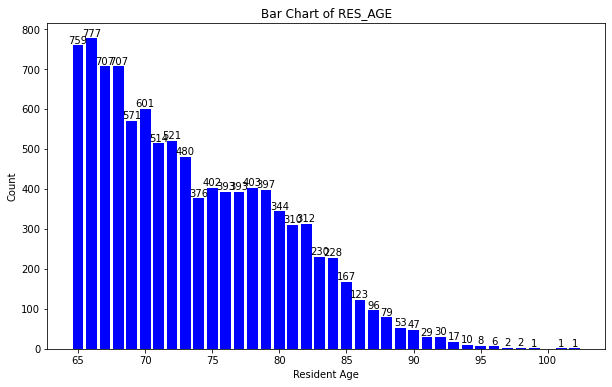

In [4]:
age_counts = df['RES_AGE'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(age_counts.index, age_counts.values, color='blue')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.xlabel('Resident Age')
plt.ylabel('Count')
plt.title('Bar Chart of RES_AGE')
plt.show()

95세 이상은 샘플수가 너무 적어 제외했습니다. 그 다음 5년 단위로 묶어서 그려봤습니다.

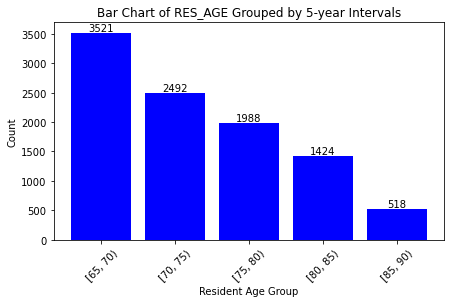

In [5]:
df = df[df['RES_AGE'] < 95]

bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)
age_group_counts = df['age_group'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(7, 4))
bars = ax.bar(age_group_counts.index.astype(str), age_group_counts.values, color='blue')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Resident Age Group')
plt.ylabel('Count')
plt.title('Bar Chart of RES_AGE Grouped by 5-year Intervals')
plt.xticks(rotation=45)
plt.show()

샘플 수는 충분해보입니다.

# 4. Feature 분석

- J3a_1_1	본인_근로소득_유무 (알아봄)
- J3b_1_1	본인_근로소득_금액 (알아봄)
- J3a_1_2	본인_사업소득_유무 (알아봄)
- J3b_1_2	본인_사업소득_금액 (알아봄)
- J3a_1_3	본인_재산소득_유무 (주식 배당: 재산소득, 매매차익: 기타소득) (알아봄)
- J3b_1_3	본인_재산소득_금액 (알아봄)
- J3a_1_4	본인_개인연금_유무 (알아봄)
- J3b_1_4	본인_개인연금_금액 (알아봄)
- J3a_1_5	본인_퇴직연금_유무 (알아봄)
- J3b_1_5	본인_퇴직연금_금액 (알아봄)
- J3a_1_6	본인_주택/농지연금_유무 
- J3b_1_6	본인_주택/농지연금_금액 
- J3a_1_7	본인_사적이전소득_유무 
- J3b_1_7	본인_사적이전소득_금액 
- J3a_1_8	본인_공적연금_유무 
- J3b_1_8	본인_공적연금_금액 
- J3a_1_9	본인_기초연금_유무 
- J3b_1_9	본인_기초연금_금액
- J3a_1_11 본인_기타공적급여_유무	
- J3b_1_11 본인_기타공적급여_금액
- J3a_1_12 본인_기타소득_유무
- J3b_1_12 본인_기타소득_금액
- J3b_1_13 본인_총수입액_금액

In [6]:
# 총소득 0인 사람 수
count_zero = (df['J3b_1_13'] == 0).sum()
print(count_zero)

61


## 4.1 근로소득

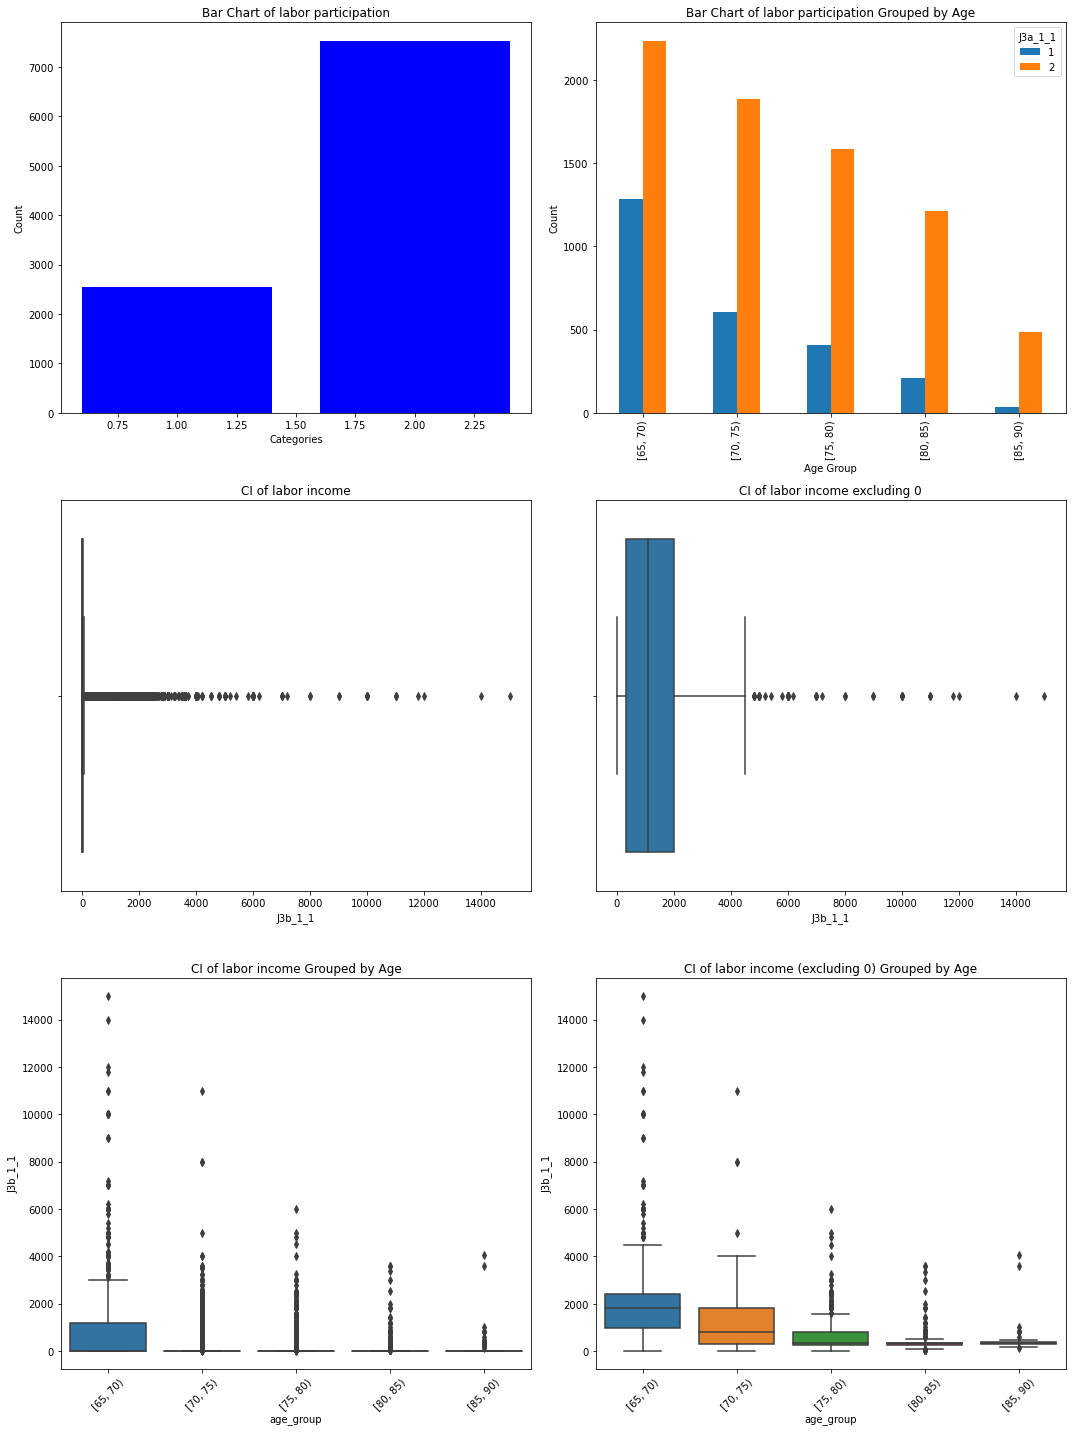

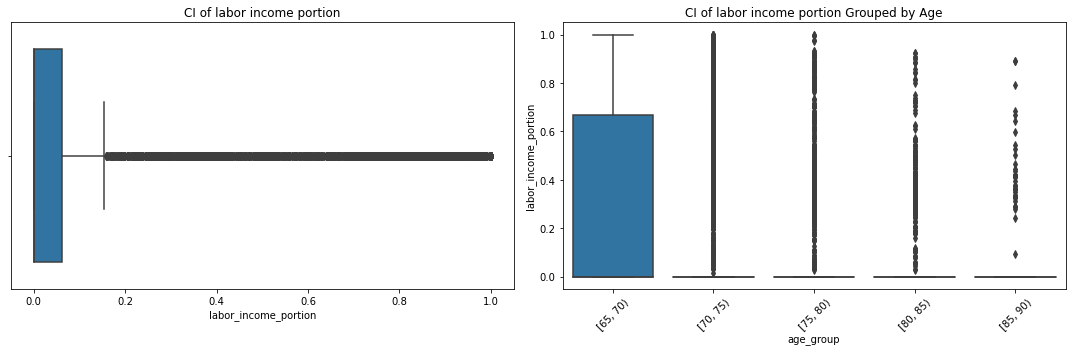

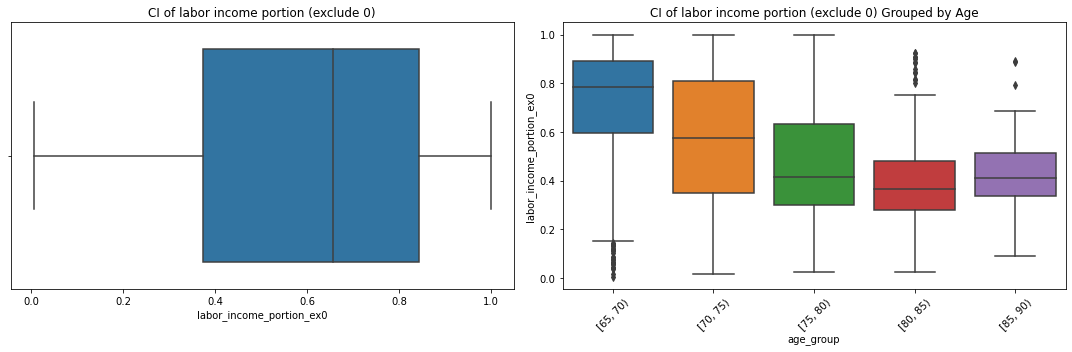

In [7]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['labor_income_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_1'] / df['J3b_1_13'], np.nan)
df['labor_income_portion_ex0'] = np.where(df['J3b_1_1'] != 0, df['J3b_1_1'] / df['J3b_1_13'], np.nan)


# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_1'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of labor participation')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_1'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of labor participation Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_1'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of labor income')

# Plot 4
df_filtered = df[df['J3b_1_1'] != 0]
sns.boxplot(x=df_filtered['J3b_1_1'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of labor income excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_1', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of labor income Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_1'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_1', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of labor income (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['labor_income_portion'], ax=ax2[0])
ax2[0].set_title('CI of labor income portion')

# Plot 8
sns.boxplot(x='age_group', y='labor_income_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of labor income portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['labor_income_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of labor income portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='labor_income_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of labor income portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 - 나이가 적을 수록 근로활동 참여율이 낮은 것을 확인 할 수 있었습니다. 
 - 그리고 나이가 적을 수록 노동소득 비중이 높은 것을 알 수 있었습니다. 
 
다만 이것이 어느 정도까지 IMF의 트라우마와 연결을 지을 수 있을지는 모르겠네요.

## 4.2 사업소득

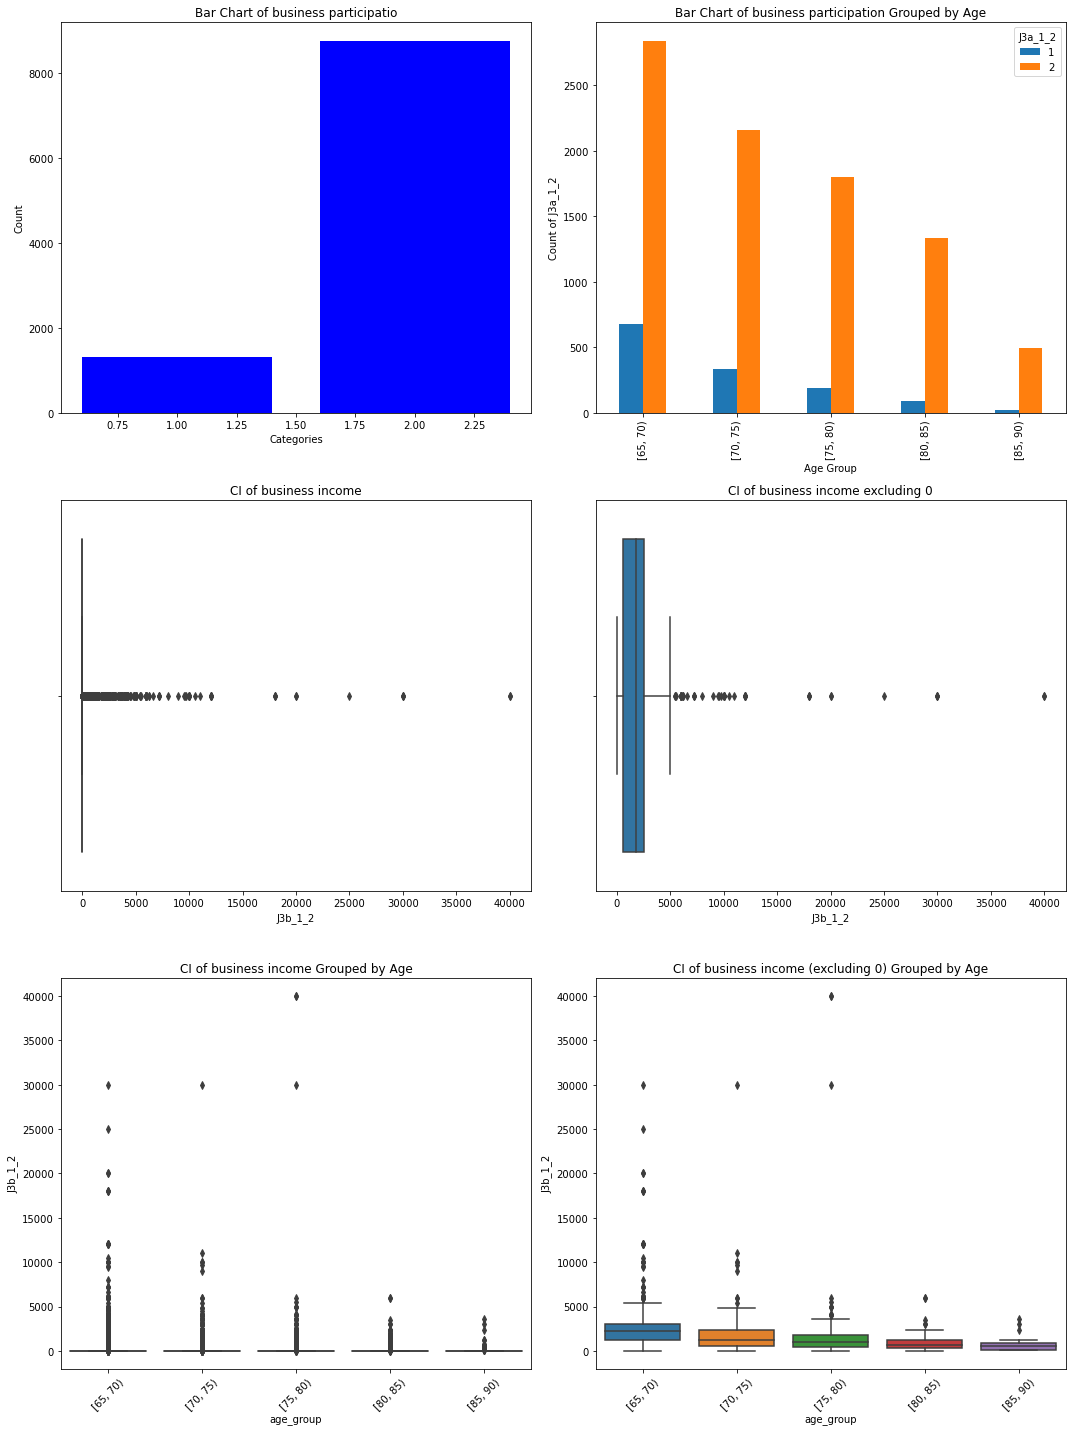

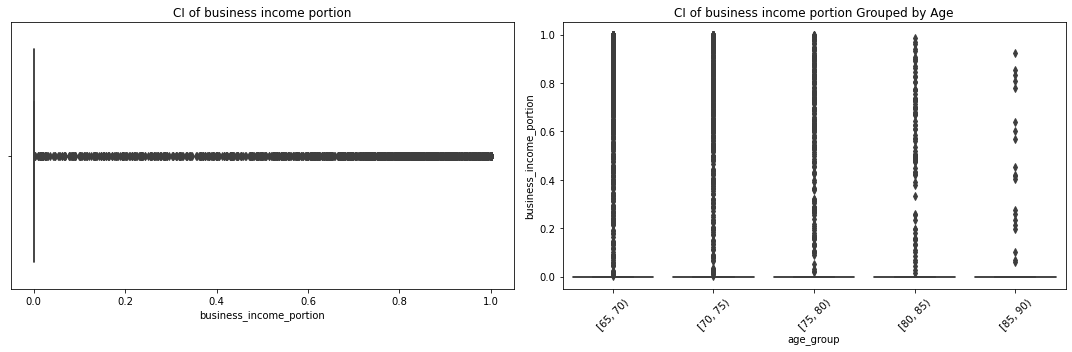

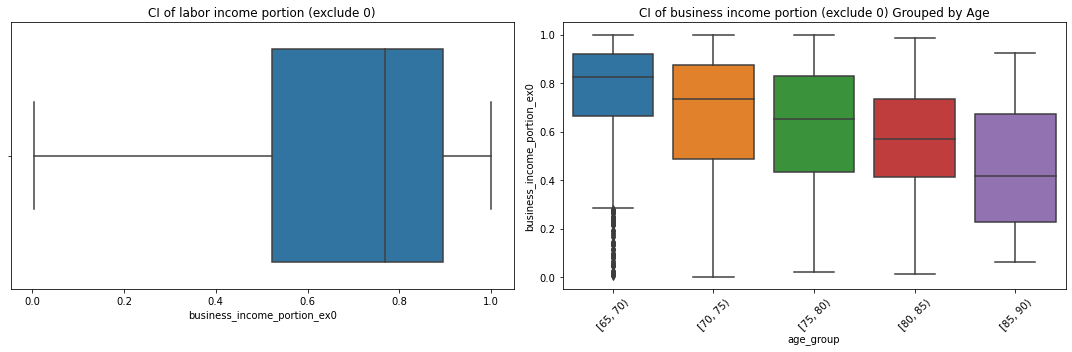

In [8]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['business_income_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_2'] / df['J3b_1_13'], np.nan)
df['business_income_portion_ex0'] = np.where(df['J3b_1_2'] != 0, df['J3b_1_2'] / df['J3b_1_13'], np.nan)

# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_2'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of business participatio')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_2'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of business participation Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count of J3a_1_2')

# Plot 3
sns.boxplot(x=df['J3b_1_2'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of business income')

# Plot 4
df_filtered = df[df['J3b_1_2'] != 0]
sns.boxplot(x=df_filtered['J3b_1_2'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of business income excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_2', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of business income Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_2'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_2', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of business income (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['business_income_portion'], ax=ax2[0])
ax2[0].set_title('CI of business income portion')

# Plot 8
sns.boxplot(x='age_group', y='business_income_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of business income portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['business_income_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of labor income portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='business_income_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of business income portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


노동소득과 비슷한 추이를 보입니다:
 - 나이가 적을 수록 사업활동 참여율이 낮은 것을 확인 할 수 있었습니다. 
 - 그리고 사업을 하는 분들 중, 나이가 적을 수록 사업소득 비중이 높은 것을 알 수 있었습니다. 

## 4.3 재산소득

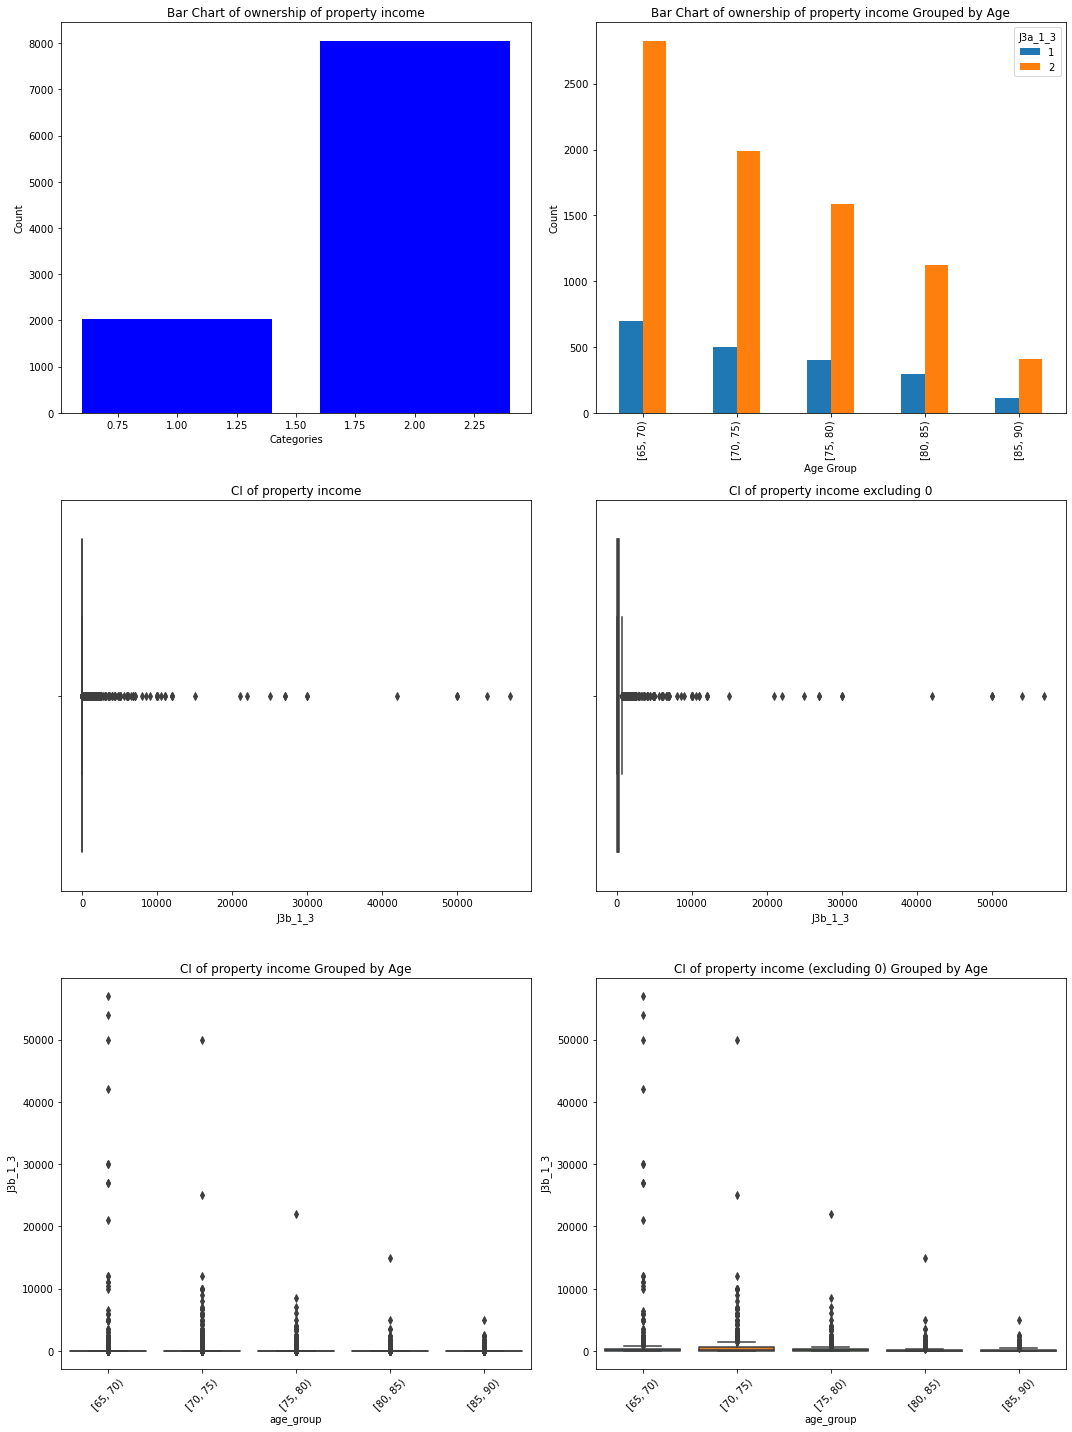

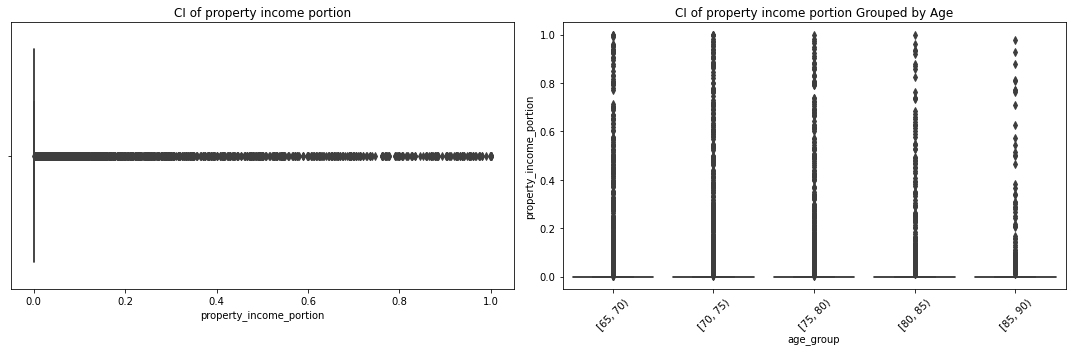

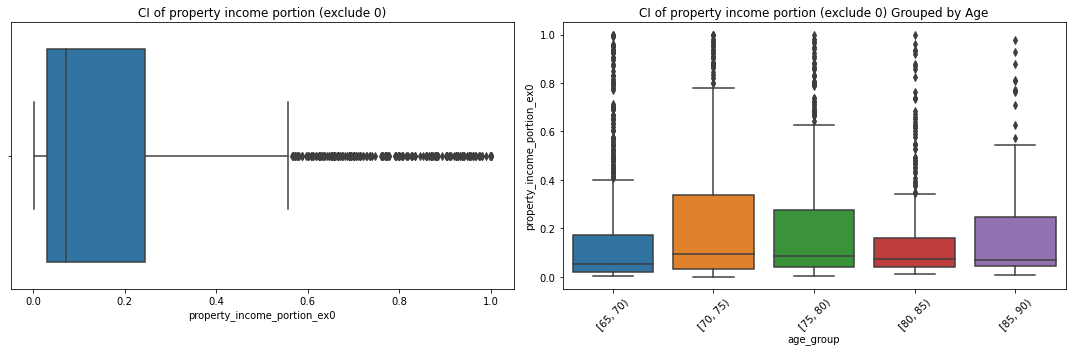

In [9]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['property_income_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_3'] / df['J3b_1_13'], np.nan)
df['property_income_portion_ex0'] = np.where(df['J3b_1_3'] != 0, df['J3b_1_3'] / df['J3b_1_13'], np.nan)

# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_3'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of ownership of property income')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_3'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of ownership of property income Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_3'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of property income')

# Plot 4
df_filtered = df[df['J3b_1_3'] != 0]
sns.boxplot(x=df_filtered['J3b_1_3'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of property income excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_3', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of property income Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_3'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_3', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of property income (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['property_income_portion'], ax=ax2[0])
ax2[0].set_title('CI of property income portion')

# Plot 8
sns.boxplot(x='age_group', y='property_income_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of property income portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['property_income_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of property income portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='property_income_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of property income portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


재산소득의 경우 근로소득과 사업소득과는 조금 다른 양상을 보입니다.
- 나이가 많을 수록 재산소득을 가진 분들의 숫자가 줄어들지만, 근로소득과 사업소득에 비해서는 완만하게 떨어지는 경향을 보입니다.
- 총소득 중 재산소득 비중은 나이와 큰 상관관계가 없는 것으로 보입니다.

## 4.4 개인연금

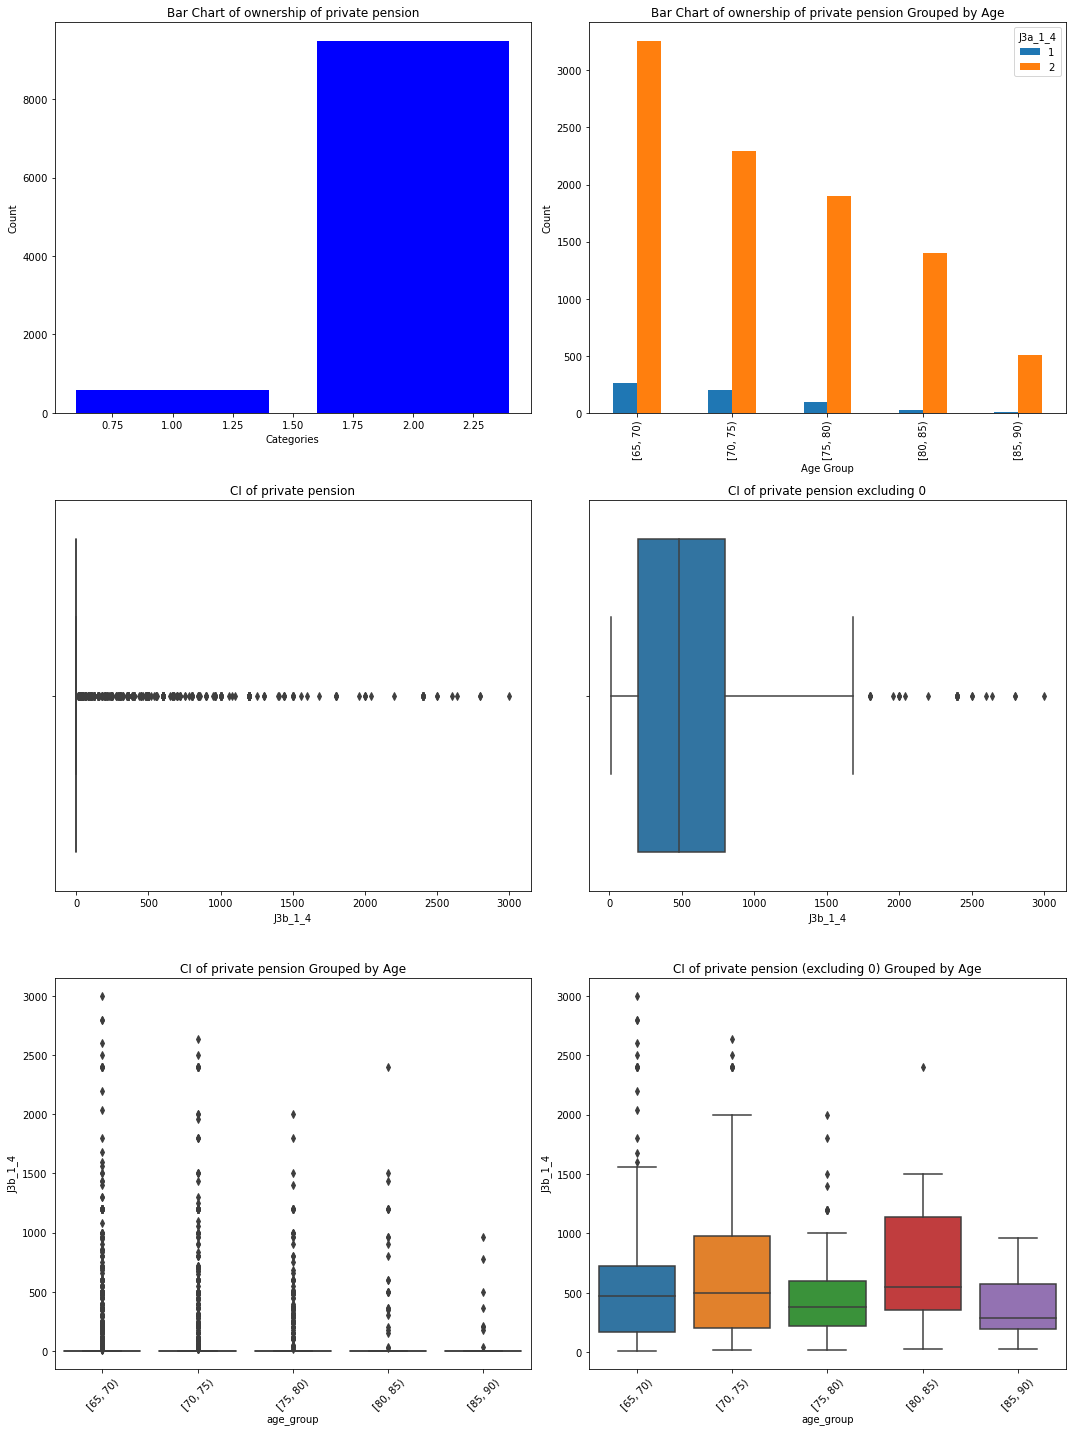

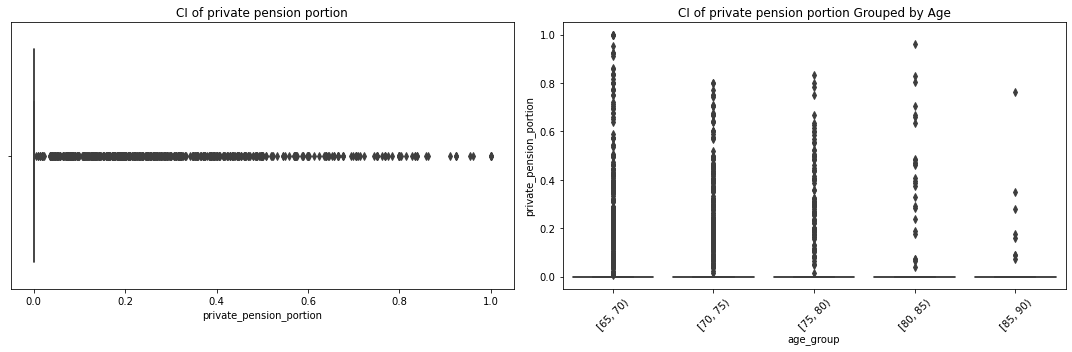

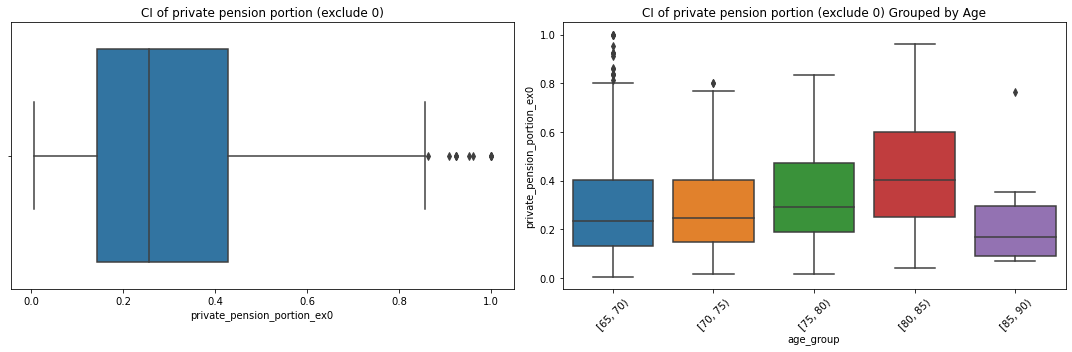

In [10]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['private_pension_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_4'] / df['J3b_1_13'], np.nan)
df['private_pension_portion_ex0'] = np.where(df['J3b_1_4'] != 0, df['J3b_1_4'] / df['J3b_1_13'], np.nan)

# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_4'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of ownership of private pension')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_4'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of ownership of private pension Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_4'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of private pension')

# Plot 4
df_filtered = df[df['J3b_1_4'] != 0]
sns.boxplot(x=df_filtered['J3b_1_4'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of private pension excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_4', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of private pension Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_4'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_4', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of private pension (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['private_pension_portion'], ax=ax2[0])
ax2[0].set_title('CI of private pension portion')

# Plot 8
sns.boxplot(x='age_group', y='private_pension_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of private pension portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['private_pension_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of private pension portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='private_pension_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of private pension portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


개인연금은 아래와 같은 양상을 보입니다:
- 개인연금을 수령하고 있는 사람의 수가 아주 낮습니다.
- 개인연금을 수령하고 있는 사람들을 보았을 때, 나이가 많을수록 개인연금 수령액이 총소득에서 차지하는 비중이 더 높아짐을 볼 수 있습니다. 개인연금을 든 사람들 중, 나이가 들수록 근로소득 등 다른 원천이 적을 것이기 때문에, 당연한 결과인 것 같네요.

##  4.5 퇴직연금

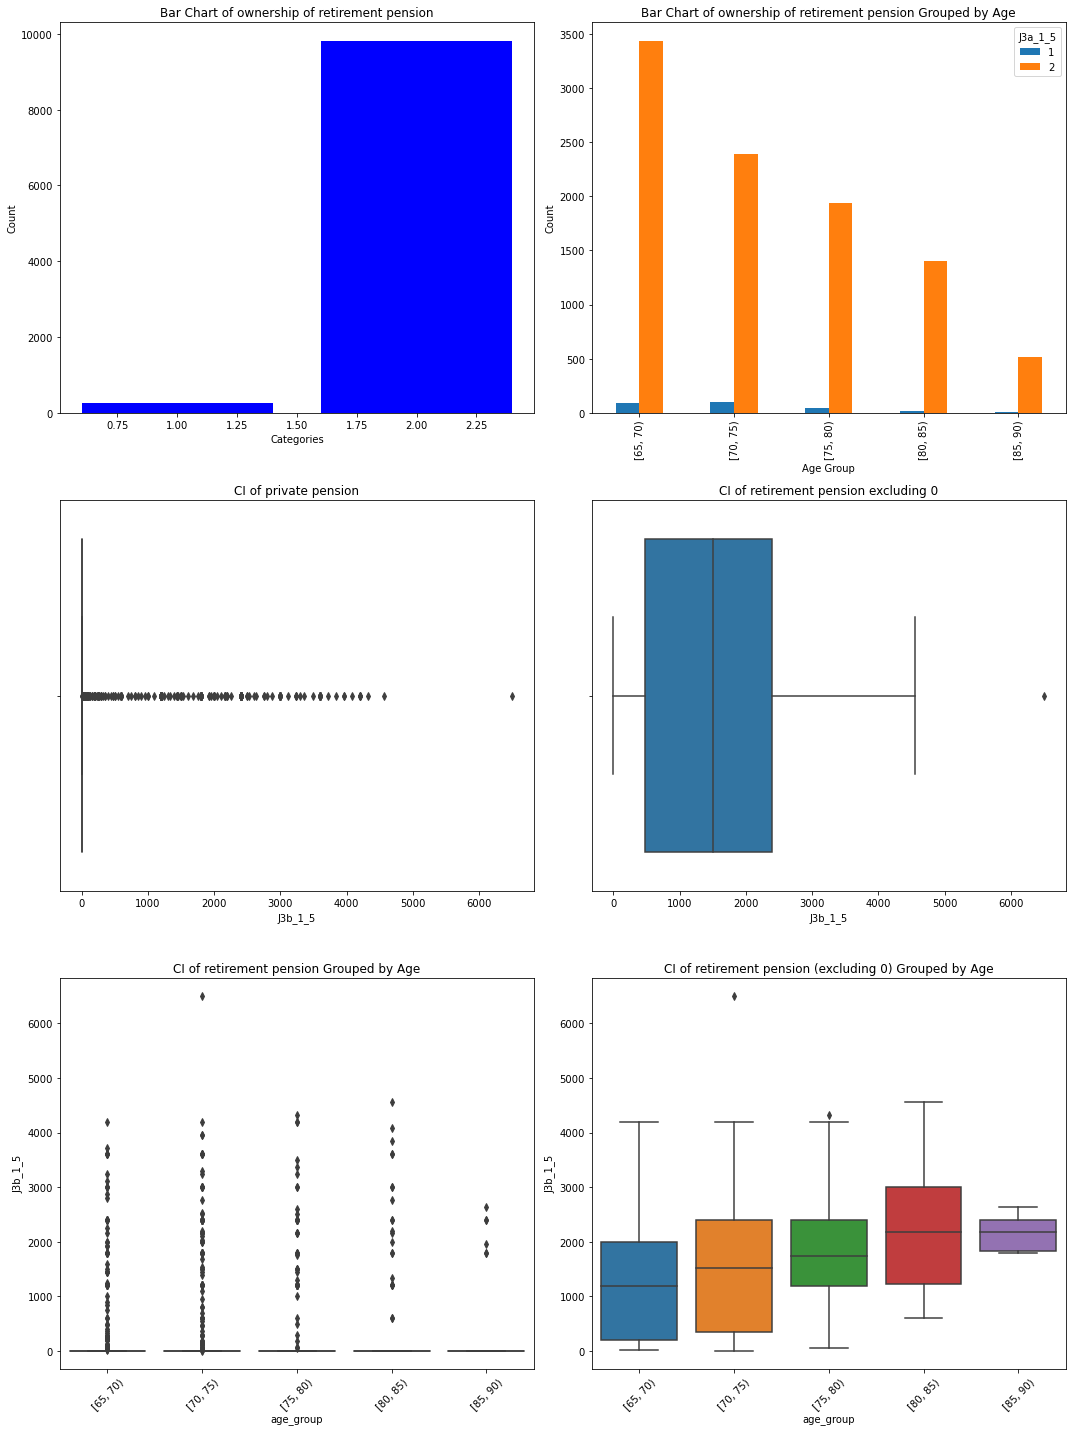

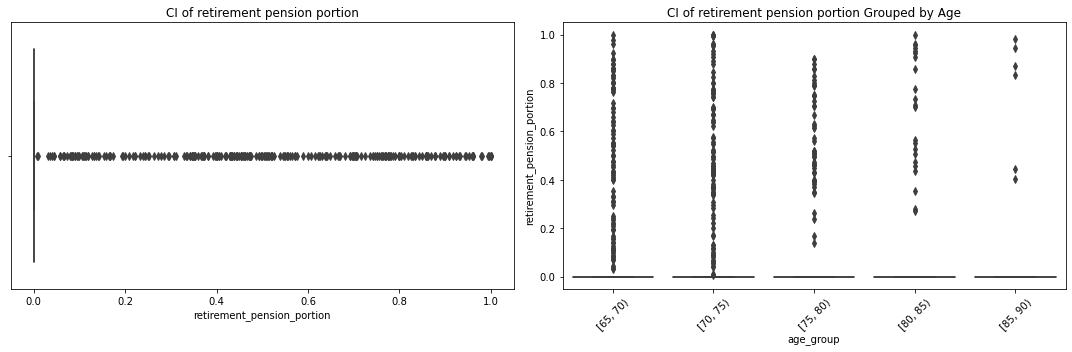

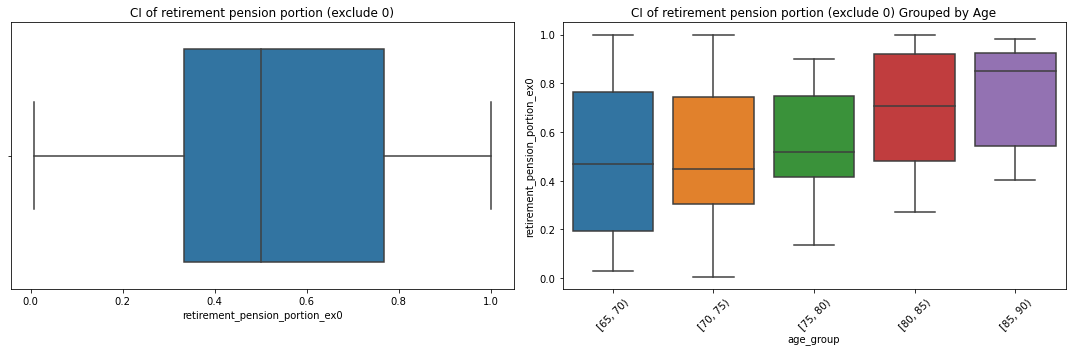

In [11]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['retirement_pension_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_5'] / df['J3b_1_13'], np.nan)
df['retirement_pension_portion_ex0'] = np.where(df['J3b_1_5'] != 0, df['J3b_1_5'] / df['J3b_1_13'], np.nan)

# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_5'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of ownership of retirement pension')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_5'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of ownership of retirement pension Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_5'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of private pension')

# Plot 4
df_filtered = df[df['J3b_1_5'] != 0]
sns.boxplot(x=df_filtered['J3b_1_5'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of retirement pension excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_5', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of retirement pension Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_5'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_5', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of retirement pension (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['retirement_pension_portion'], ax=ax2[0])
ax2[0].set_title('CI of retirement pension portion')

# Plot 8
sns.boxplot(x='age_group', y='retirement_pension_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of retirement pension portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['retirement_pension_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of retirement pension portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='retirement_pension_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of retirement pension portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


퇴직연금을 수령하는 사람은 거의 없다시피 합니다. 그리고 수령자 중 퇴직연금이 총소득에 차지하는 비중은 나이가 들수록 높아집니다. 개인연금과 마찬가지로, 대부분 이런 성격을 지니는 것 같습니다. 

## 4.6 주택/농지연금

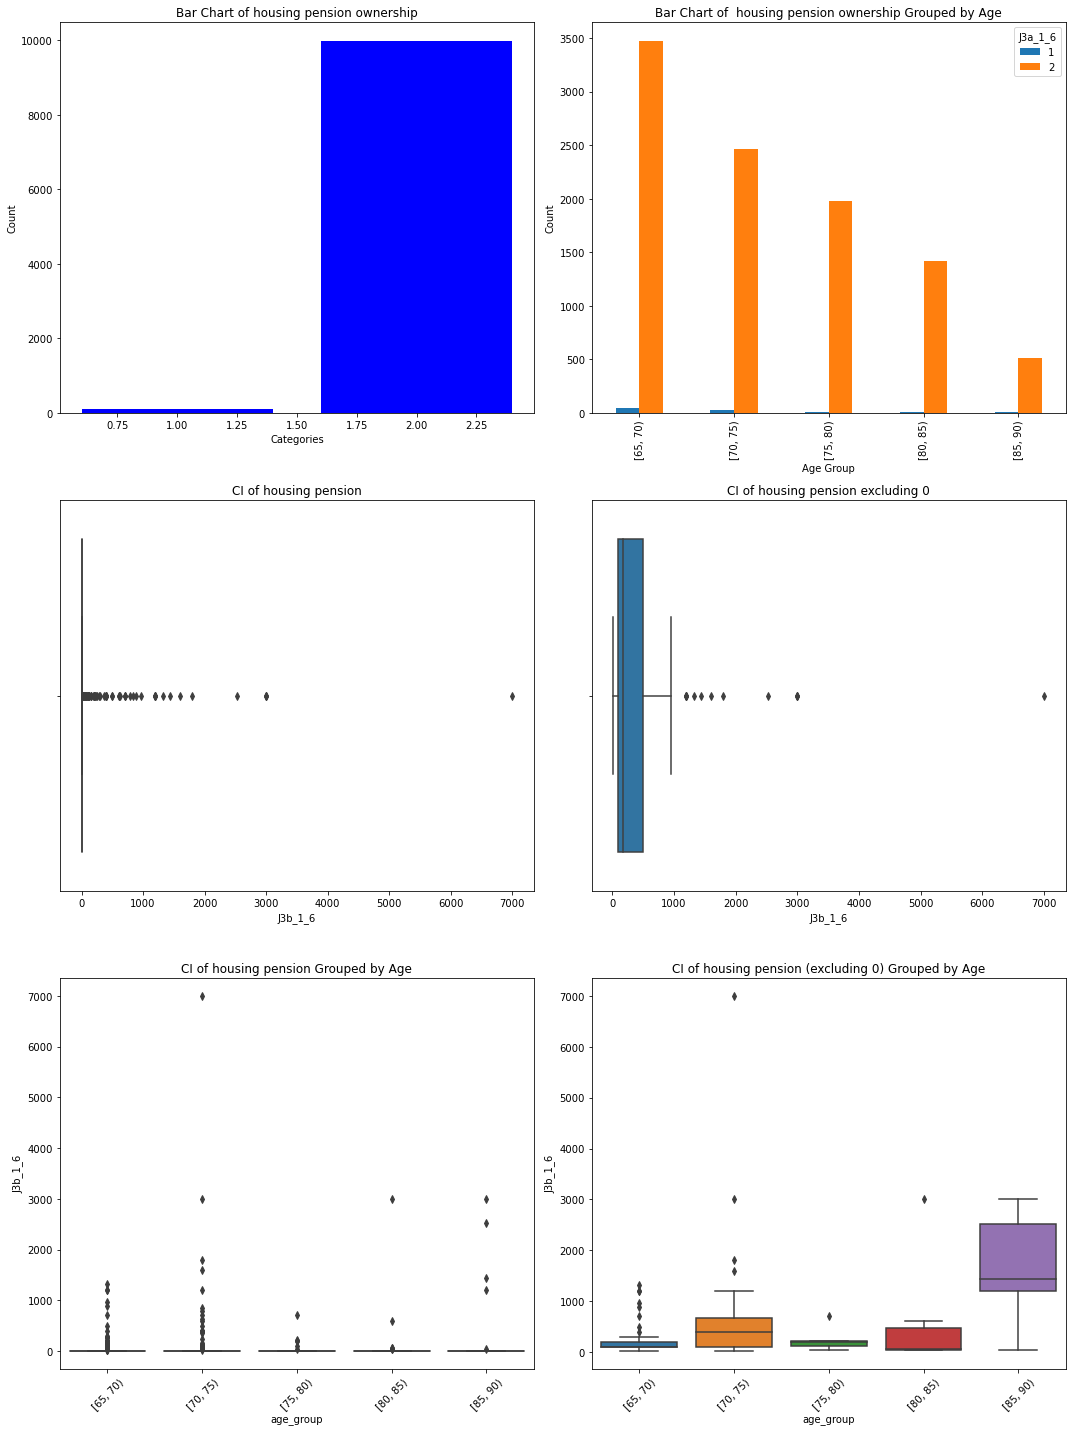

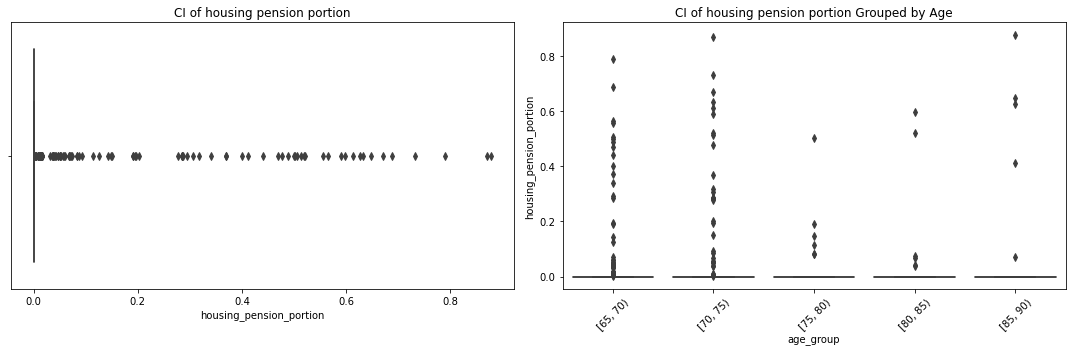

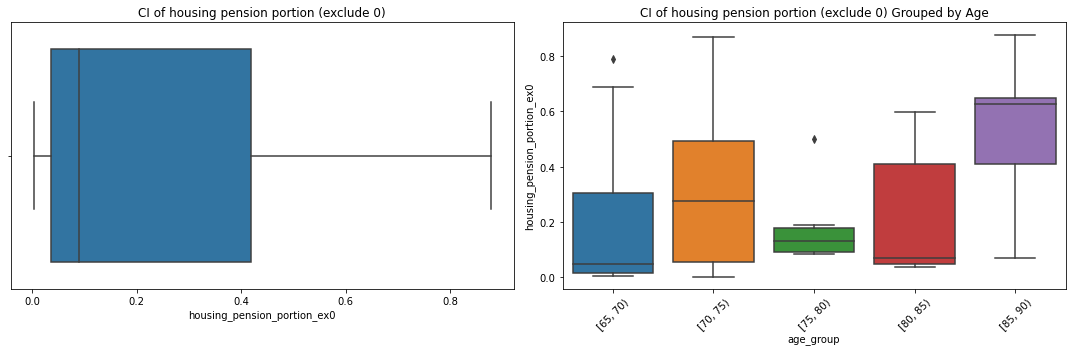

In [12]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['housing_pension_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_6'] / df['J3b_1_13'], np.nan)
df['housing_pension_portion_ex0'] = np.where(df['J3b_1_6'] != 0, df['J3b_1_6'] / df['J3b_1_13'], np.nan)


# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_6'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of housing pension ownership')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_6'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of  housing pension ownership Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_6'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of housing pension')

# Plot 4
df_filtered = df[df['J3b_1_6'] != 0]
sns.boxplot(x=df_filtered['J3b_1_6'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of housing pension excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_6', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of housing pension Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_6'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_6', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of housing pension (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['housing_pension_portion'], ax=ax2[0])
ax2[0].set_title('CI of housing pension portion')

# Plot 8
sns.boxplot(x='age_group', y='housing_pension_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of housing pension portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['housing_pension_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of housing pension portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='housing_pension_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of housing pension portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


주택/농지연금 역시 수령자가 너무 적습니다. 유효한 인사이트를 만들기는 힘들어 보이네요.

## 4.7 사적이전소득

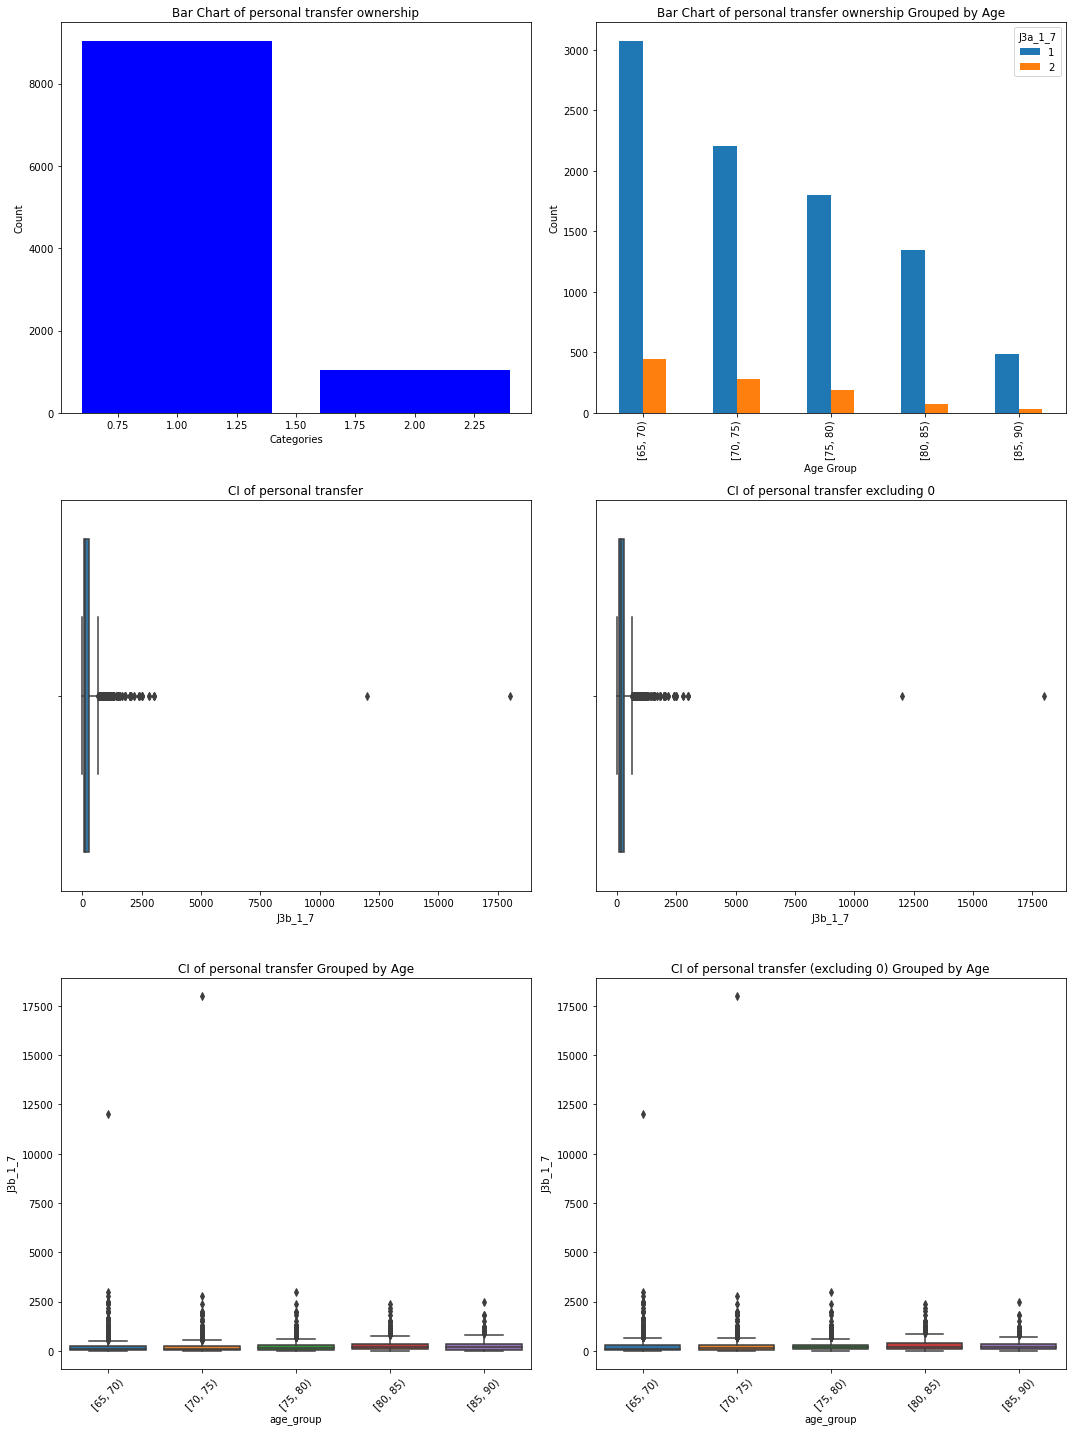

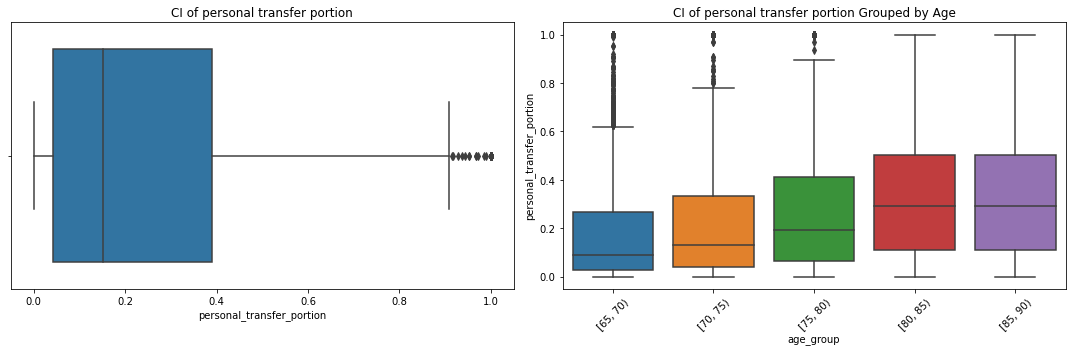

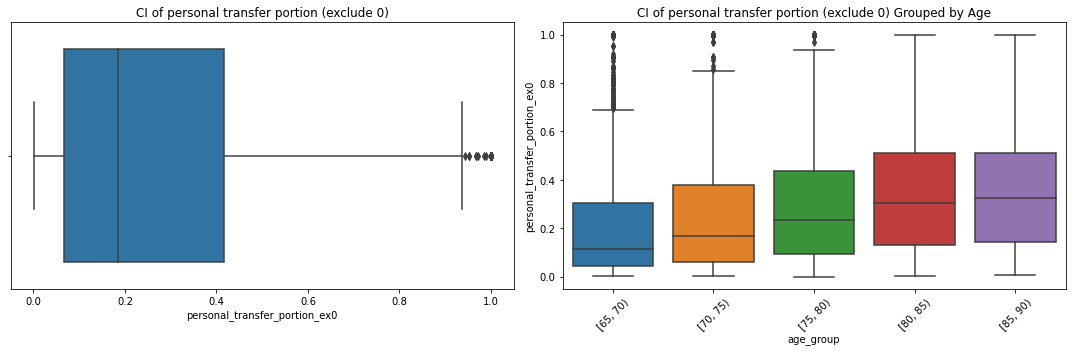

In [13]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['personal_transfer_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_7'] / df['J3b_1_13'], np.nan)
df['personal_transfer_portion_ex0'] = np.where(df['J3b_1_7'] != 0, df['J3b_1_7'] / df['J3b_1_13'], np.nan)


# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_7'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of personal transfer ownership')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_7'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of personal transfer ownership Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_7'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of personal transfer')

# Plot 4
df_filtered = df[df['J3b_1_7'] != 0]
sns.boxplot(x=df_filtered['J3b_1_7'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of personal transfer excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_7', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of personal transfer Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_7'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_7', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of personal transfer (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['personal_transfer_portion'], ax=ax2[0])
ax2[0].set_title('CI of personal transfer portion')

# Plot 8
sns.boxplot(x='age_group', y='personal_transfer_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of personal transfer portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['personal_transfer_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of personal transfer portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='personal_transfer_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of personal transfer portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


대부분의 노인분들이 사적이전소득을 수령하고 있습니다. 그리고 나이가 들수록 사적이전소득이 총소득에 차지하는 비중이 높다는 것을 볼 수 있었습니다.

## 4.8 공적연금

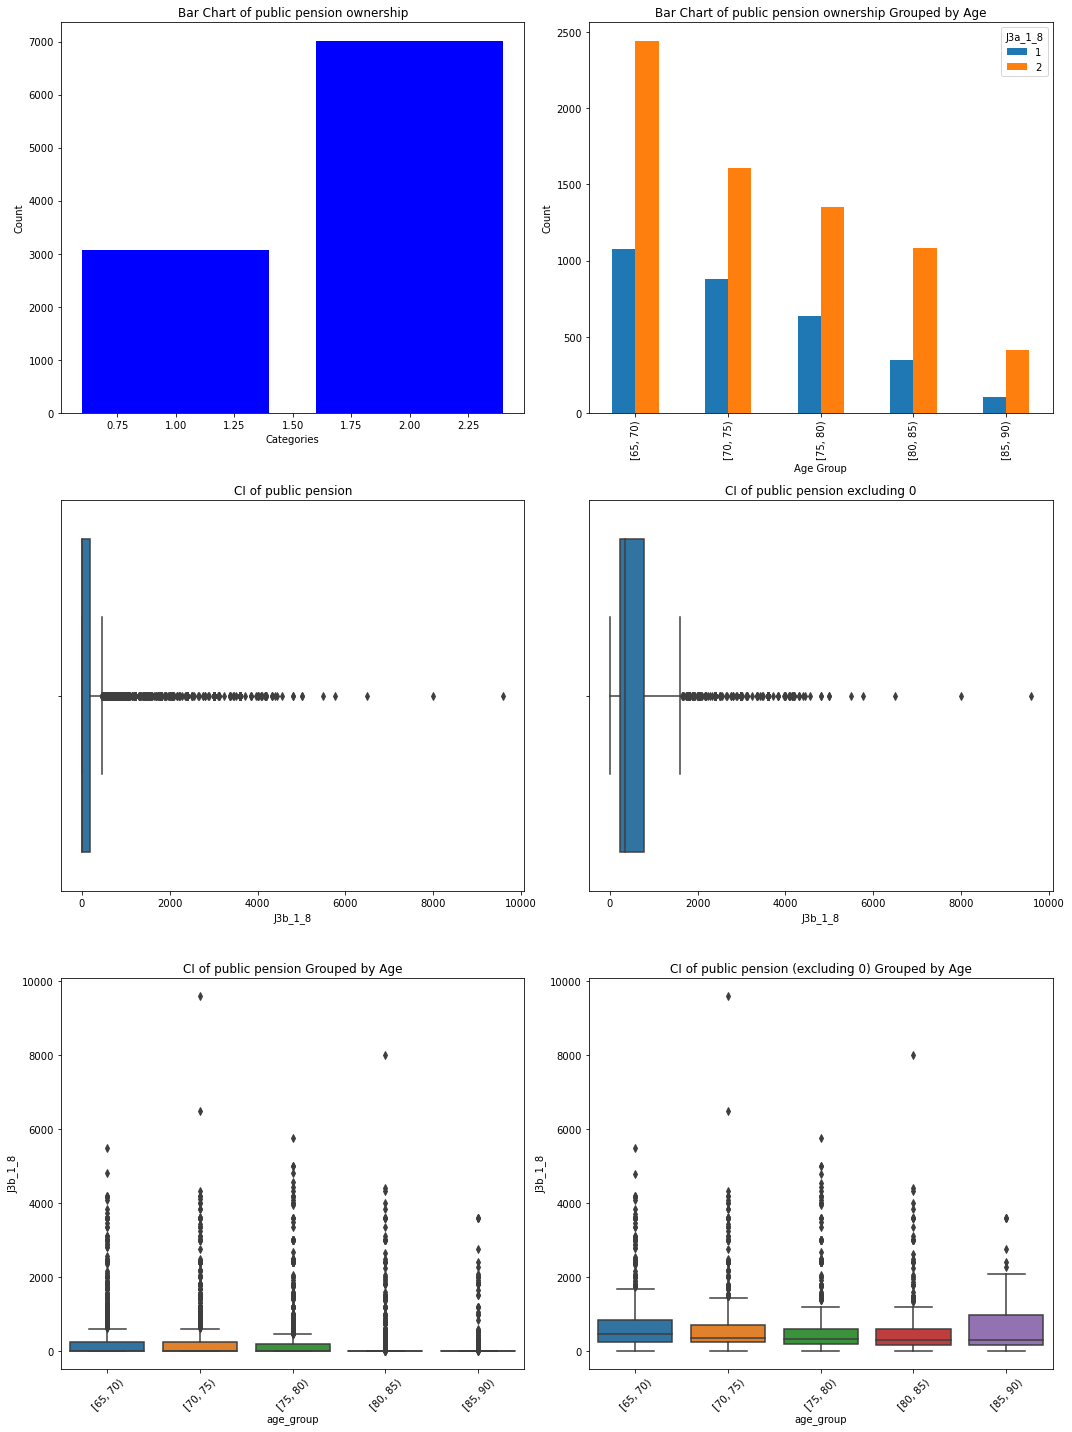

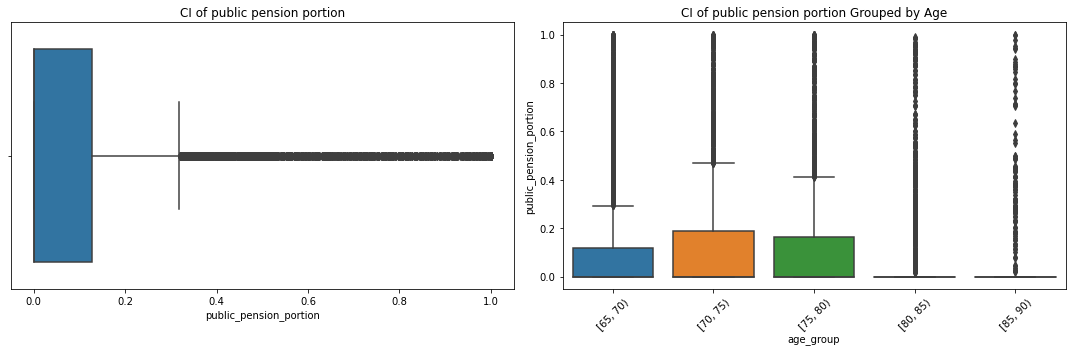

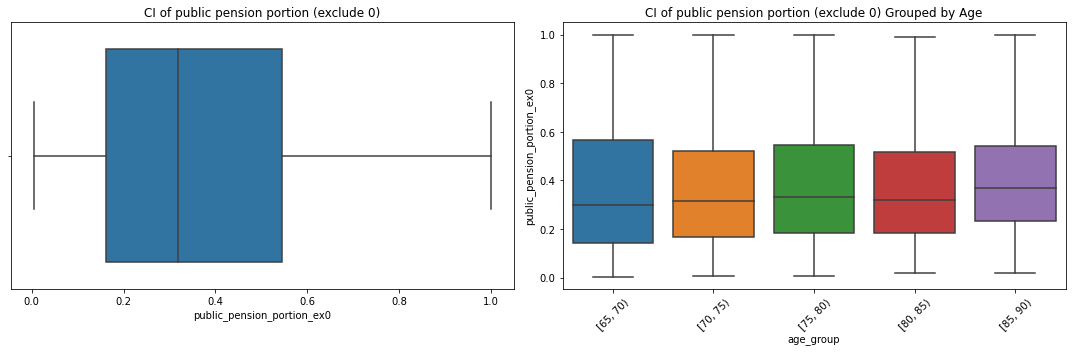

In [14]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['public_pension_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_8'] / df['J3b_1_13'], np.nan)
df['public_pension_portion_ex0'] = np.where(df['J3b_1_8'] != 0, df['J3b_1_8'] / df['J3b_1_13'], np.nan)


# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_8'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of public pension ownership')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_8'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of public pension ownership Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_8'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of public pension')

# Plot 4
df_filtered = df[df['J3b_1_8'] != 0]
sns.boxplot(x=df_filtered['J3b_1_8'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of public pension excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_8', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of public pension Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_8'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_8', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of public pension (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['public_pension_portion'], ax=ax2[0])
ax2[0].set_title('CI of public pension portion')

# Plot 8
sns.boxplot(x='age_group', y='public_pension_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of public pension portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['public_pension_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of public pension portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='public_pension_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of public pension portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


조금 이상한 것이, 공적연금을 수령하는 사람이 약 3000명이라고 나옵니다. 

그리고 수령자 중 공적연금이 총소득에 차지하는 비중은 나이와 무관하게 일정하게 나옵니다.

# 4.9 기초연금

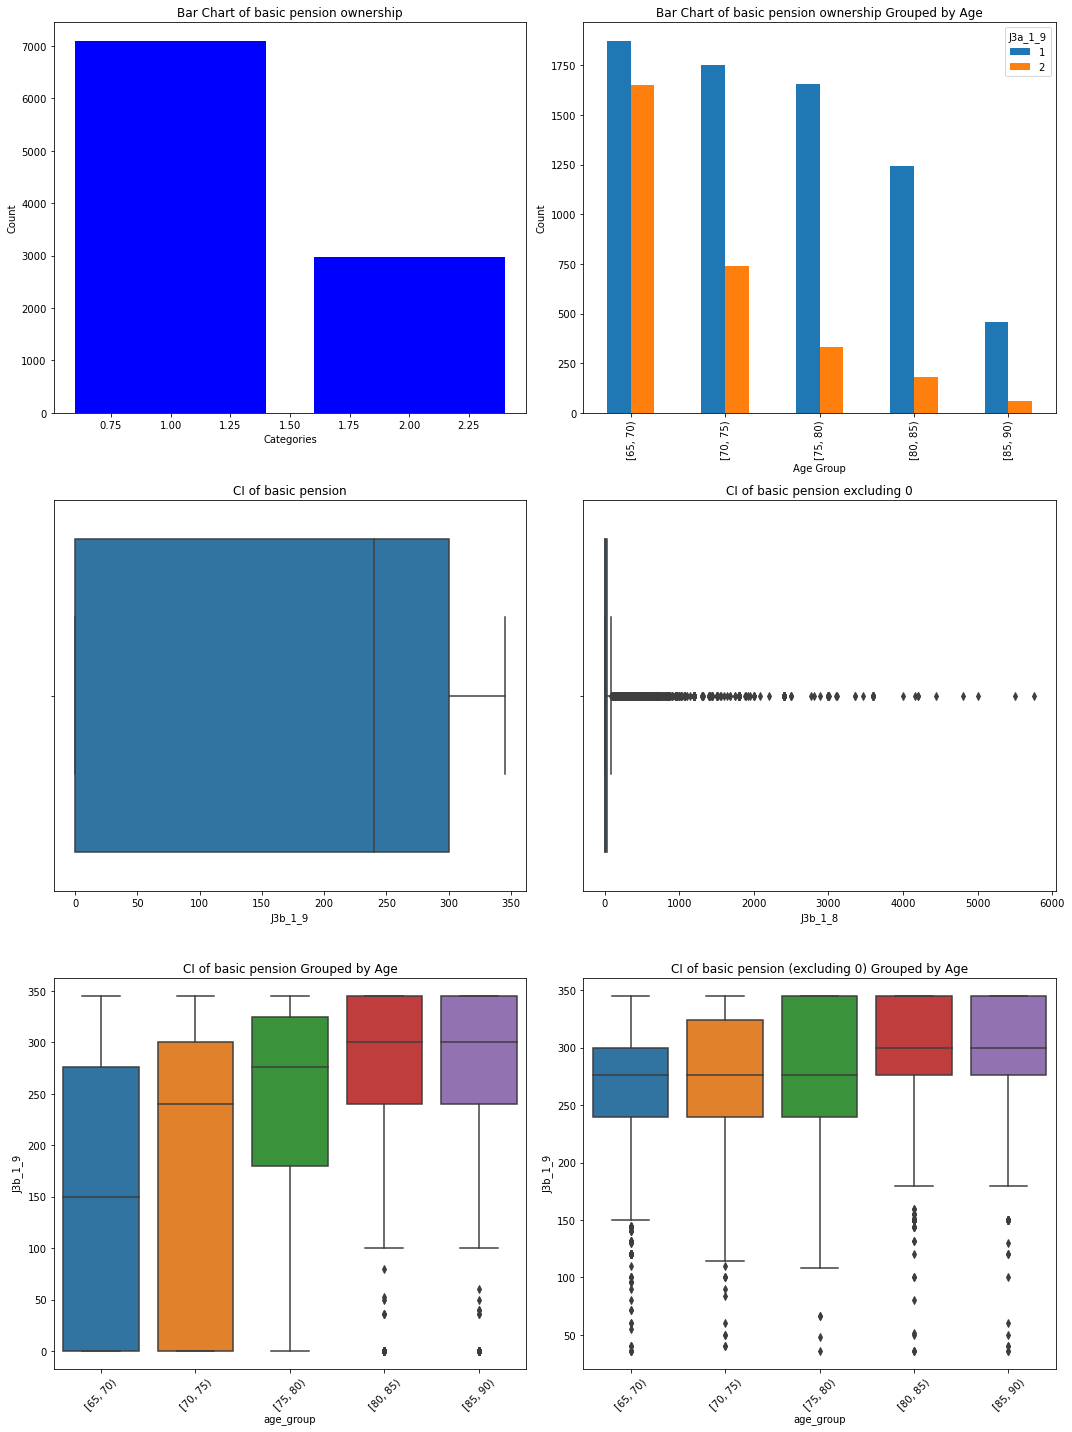

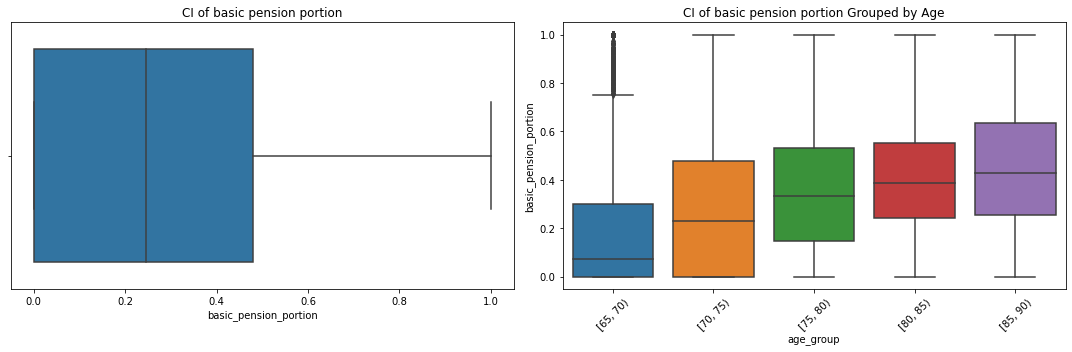

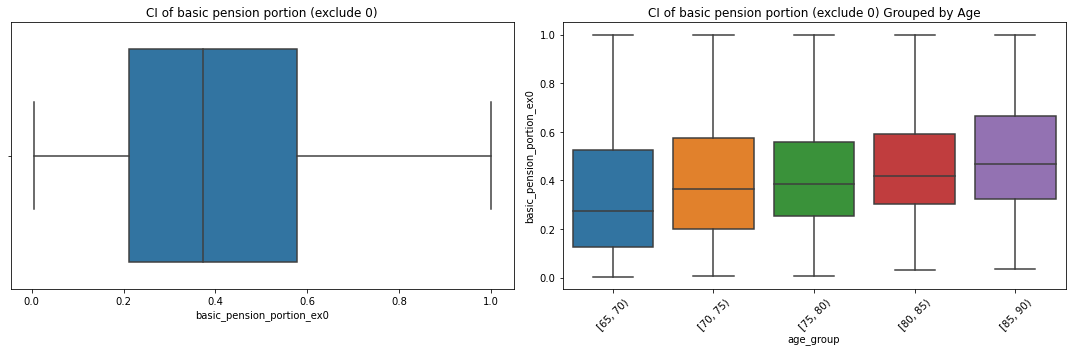

In [16]:
# Define age intervals
bins = np.arange(65, 95, 5)
df['age_group'] = pd.cut(df['RES_AGE'], bins=bins, right=False)

# Calculate quotient and handle division by zero
df['basic_pension_portion'] = np.where(df['J3b_1_13'] != 0, df['J3b_1_9'] / df['J3b_1_13'], np.nan)
df['basic_pension_portion_ex0'] = np.where(df['J3b_1_9'] != 0, df['J3b_1_9'] / df['J3b_1_13'], np.nan)


# First set of plots
fig1, ax1 = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1
counts1 = df['J3a_1_9'].value_counts().sort_index()
ax1[0, 0].bar(counts1.index, counts1.values, color='blue')
ax1[0, 0].set_title('Bar Chart of basic pension ownership')
ax1[0, 0].set_xlabel('Categories')
ax1[0, 0].set_ylabel('Count')

# Plot 2
crosstab = pd.crosstab(df['age_group'], df['J3a_1_9'])
crosstab.plot(kind='bar', stacked=False, ax=ax1[0, 1])
ax1[0, 1].set_title('Bar Chart of basic pension ownership Grouped by Age')
ax1[0, 1].set_xlabel('Age Group')
ax1[0, 1].set_ylabel('Count')

# Plot 3
sns.boxplot(x=df['J3b_1_9'], ax=ax1[1, 0])
ax1[1, 0].set_title('CI of basic pension')

# Plot 4
df_filtered = df[df['J3b_1_9'] != 0]
sns.boxplot(x=df_filtered['J3b_1_8'], ax=ax1[1, 1])
ax1[1, 1].set_title('CI of basic pension excluding 0')

# Plot 5
sns.boxplot(x='age_group', y='J3b_1_9', data=df, ax=ax1[2, 0])
ax1[2, 0].set_title('CI of basic pension Grouped by Age')
ax1[2, 0].tick_params(axis='x', rotation=45)

# Plot 6
df_filtered = df[(df['J3b_1_9'] != 0)]
sns.boxplot(x='age_group', y='J3b_1_9', data=df_filtered, ax=ax1[2, 1])
ax1[2, 1].set_title('CI of basic pension (excluding 0) Grouped by Age')
ax1[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Second set of plots
fig2, ax2 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 7
sns.boxplot(x=df['basic_pension_portion'], ax=ax2[0])
ax2[0].set_title('CI of basic pension portion')

# Plot 8
sns.boxplot(x='age_group', y='basic_pension_portion', data=df, ax=ax2[1])
ax2[1].set_title('CI of basic pension portion Grouped by Age')
ax2[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Third set of plots
fig3, ax3 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 9
sns.boxplot(x=df['basic_pension_portion_ex0'], ax=ax3[0])
ax3[0].set_title('CI of basic pension portion (exclude 0)')

# Plot 10
sns.boxplot(x='age_group', y='basic_pension_portion_ex0', data=df, ax=ax3[1])
ax3[1].set_title('CI of basic pension portion (exclude 0) Grouped by Age')
ax3[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


기초연금 같은 경우, 수령하는 분의 비중이 꽤 높습니다. 그리고 수령액도, 기초연금이 총소득에서 차지하는 비중도, 나이가 높아질수록 높아집니다.